In [63]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import Database 
from sqlalchemy import create_engine

from sqlalchemy.orm import close_all_sessions

import config

In [64]:
# Creating Database Connection

# database_str = f'postgres://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_ADDRESS}:{POSTGRES_PORT}/{POSTGRES_DBNAME}'

# engine = create_engine(database_str)

In [65]:
# Reading Data from CSV and assign to Dataframe
combined_df = pd.read_csv('../SQL/combined_wine_quality.csv')

#Viewing Dataframe
combined_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,id
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,red,20
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,red,70
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,red,796
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,red,1245
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,red,1089
5,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,red,563
6,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,1296
7,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4,red,69
8,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5,red,528
9,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,red,1203


In [66]:
# List column Names
list(combined_df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color',
 'id']

In [67]:
# Checking for Null/Empty Values

combined_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
id                      0
dtype: int64

In [68]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,2043.535632
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,1436.926393
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,813.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1650.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,3274.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,4898.000000


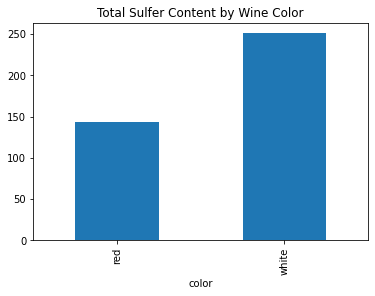

In [69]:
combined_df.groupby('color')['total sulfur dioxide'].nunique().plot(kind='bar')
plt.title("Total Sulfer Content by Wine Color")
plt.show()

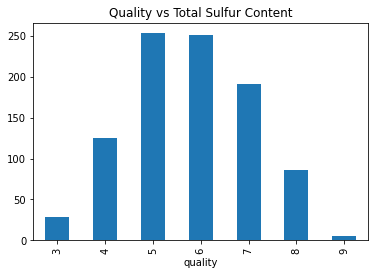

In [70]:
combined_df.groupby('quality')['total sulfur dioxide'].nunique().plot(kind='bar')
plt.title("Quality vs Total Sulfur Content")
plt.show()

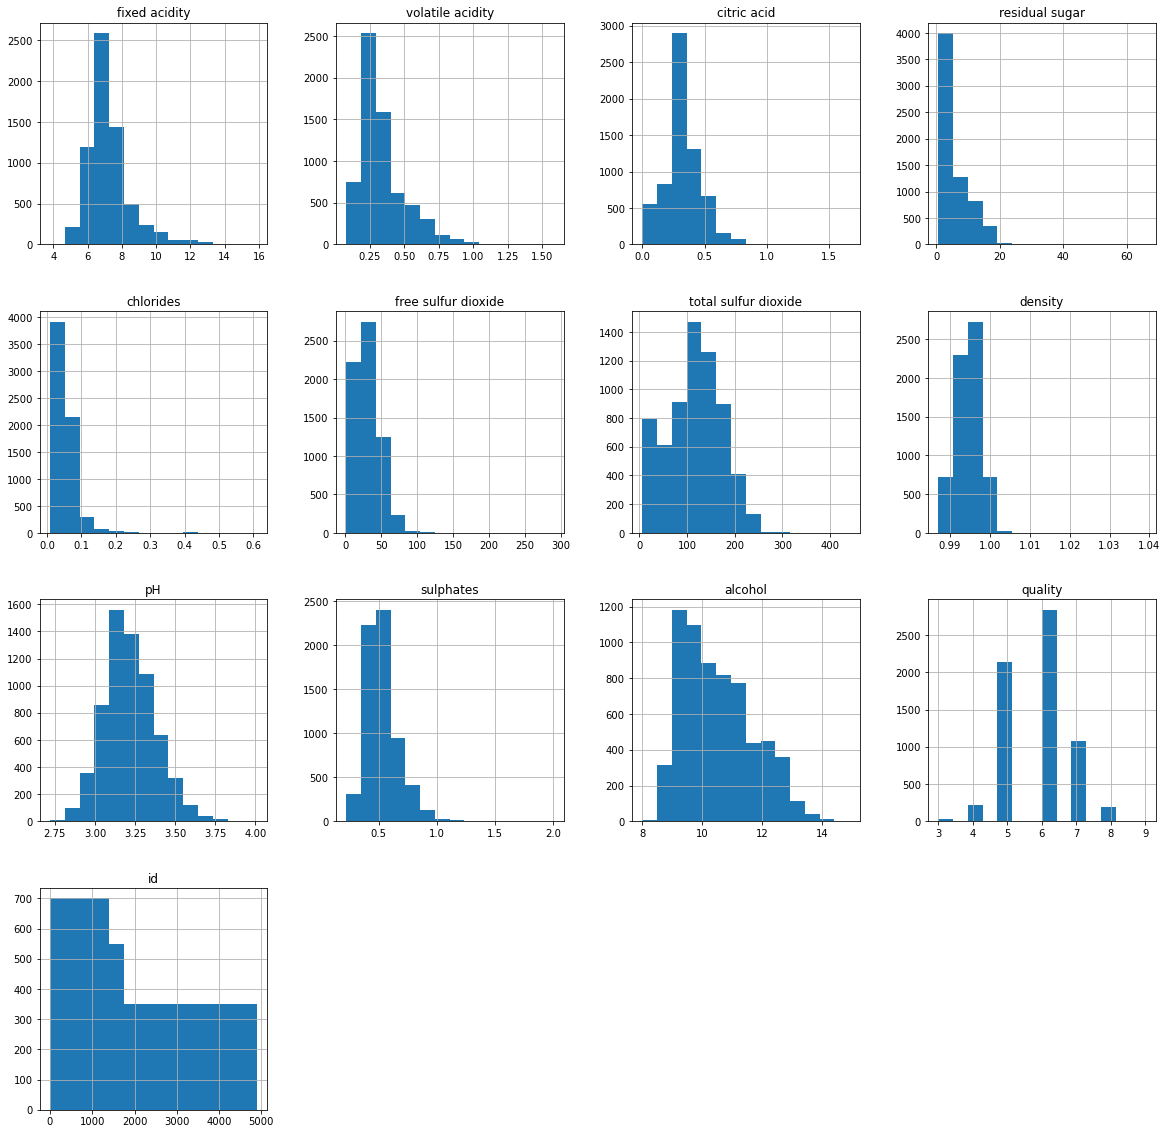

In [71]:
combined_df.hist(bins= 14, figsize=(20,20))
plt.show()

In [72]:
target = ["color"]
x = {'Current': 'quality'}   
test_df = combined_df.replace(x)
x = dict.fromkeys(['sulphates', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'], 'quality')    
test_df = combined_df.replace(x)

test_df.reset_index(inplace=True, drop=True)

test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,id
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,red,20
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,red,70
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,red,796
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,red,1245
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,red,1089


In [73]:
from sklearn.model_selection import train_test_split
# Create our features

X = combined_df.drop("color", axis=1)
X = pd.get_dummies(X)

# Create our target
y = test_df[['color']]

In [74]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,2043.535632
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,1436.926393
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,813.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1650.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,3274.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,4898.000000


In [75]:
y['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print("Training:",Counter(y_train['color']))
print("Test:",Counter(y_test['color']))

Training: Counter({'white': 4408, 'red': 1439})
Test: Counter({'white': 490, 'red': 160})


In [94]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
mod1 = model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         red       0.97      0.99      0.98       160
       white       1.00      0.99      0.99       490

    accuracy                           0.99       650
   macro avg       0.98      0.99      0.99       650
weighted avg       0.99      0.99      0.99       650



In [95]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state=1)
mod2 = model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

/var/folders/hd/m_vx3zjx3qg6lt8mz9bzjd440000gn/T/ipykernel_4052/4087177581.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod2 = model2.fit(X_train, y_train)


              precision    recall  f1-score   support

         red       1.00      0.99      1.00       160
       white       1.00      1.00      1.00       490

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



In [96]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier(random_state=1)
mod3 = model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

/Users/dhileepan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         red       0.99      1.00      0.99       160
       white       1.00      1.00      1.00       490

    accuracy                           1.00       650
   macro avg       0.99      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



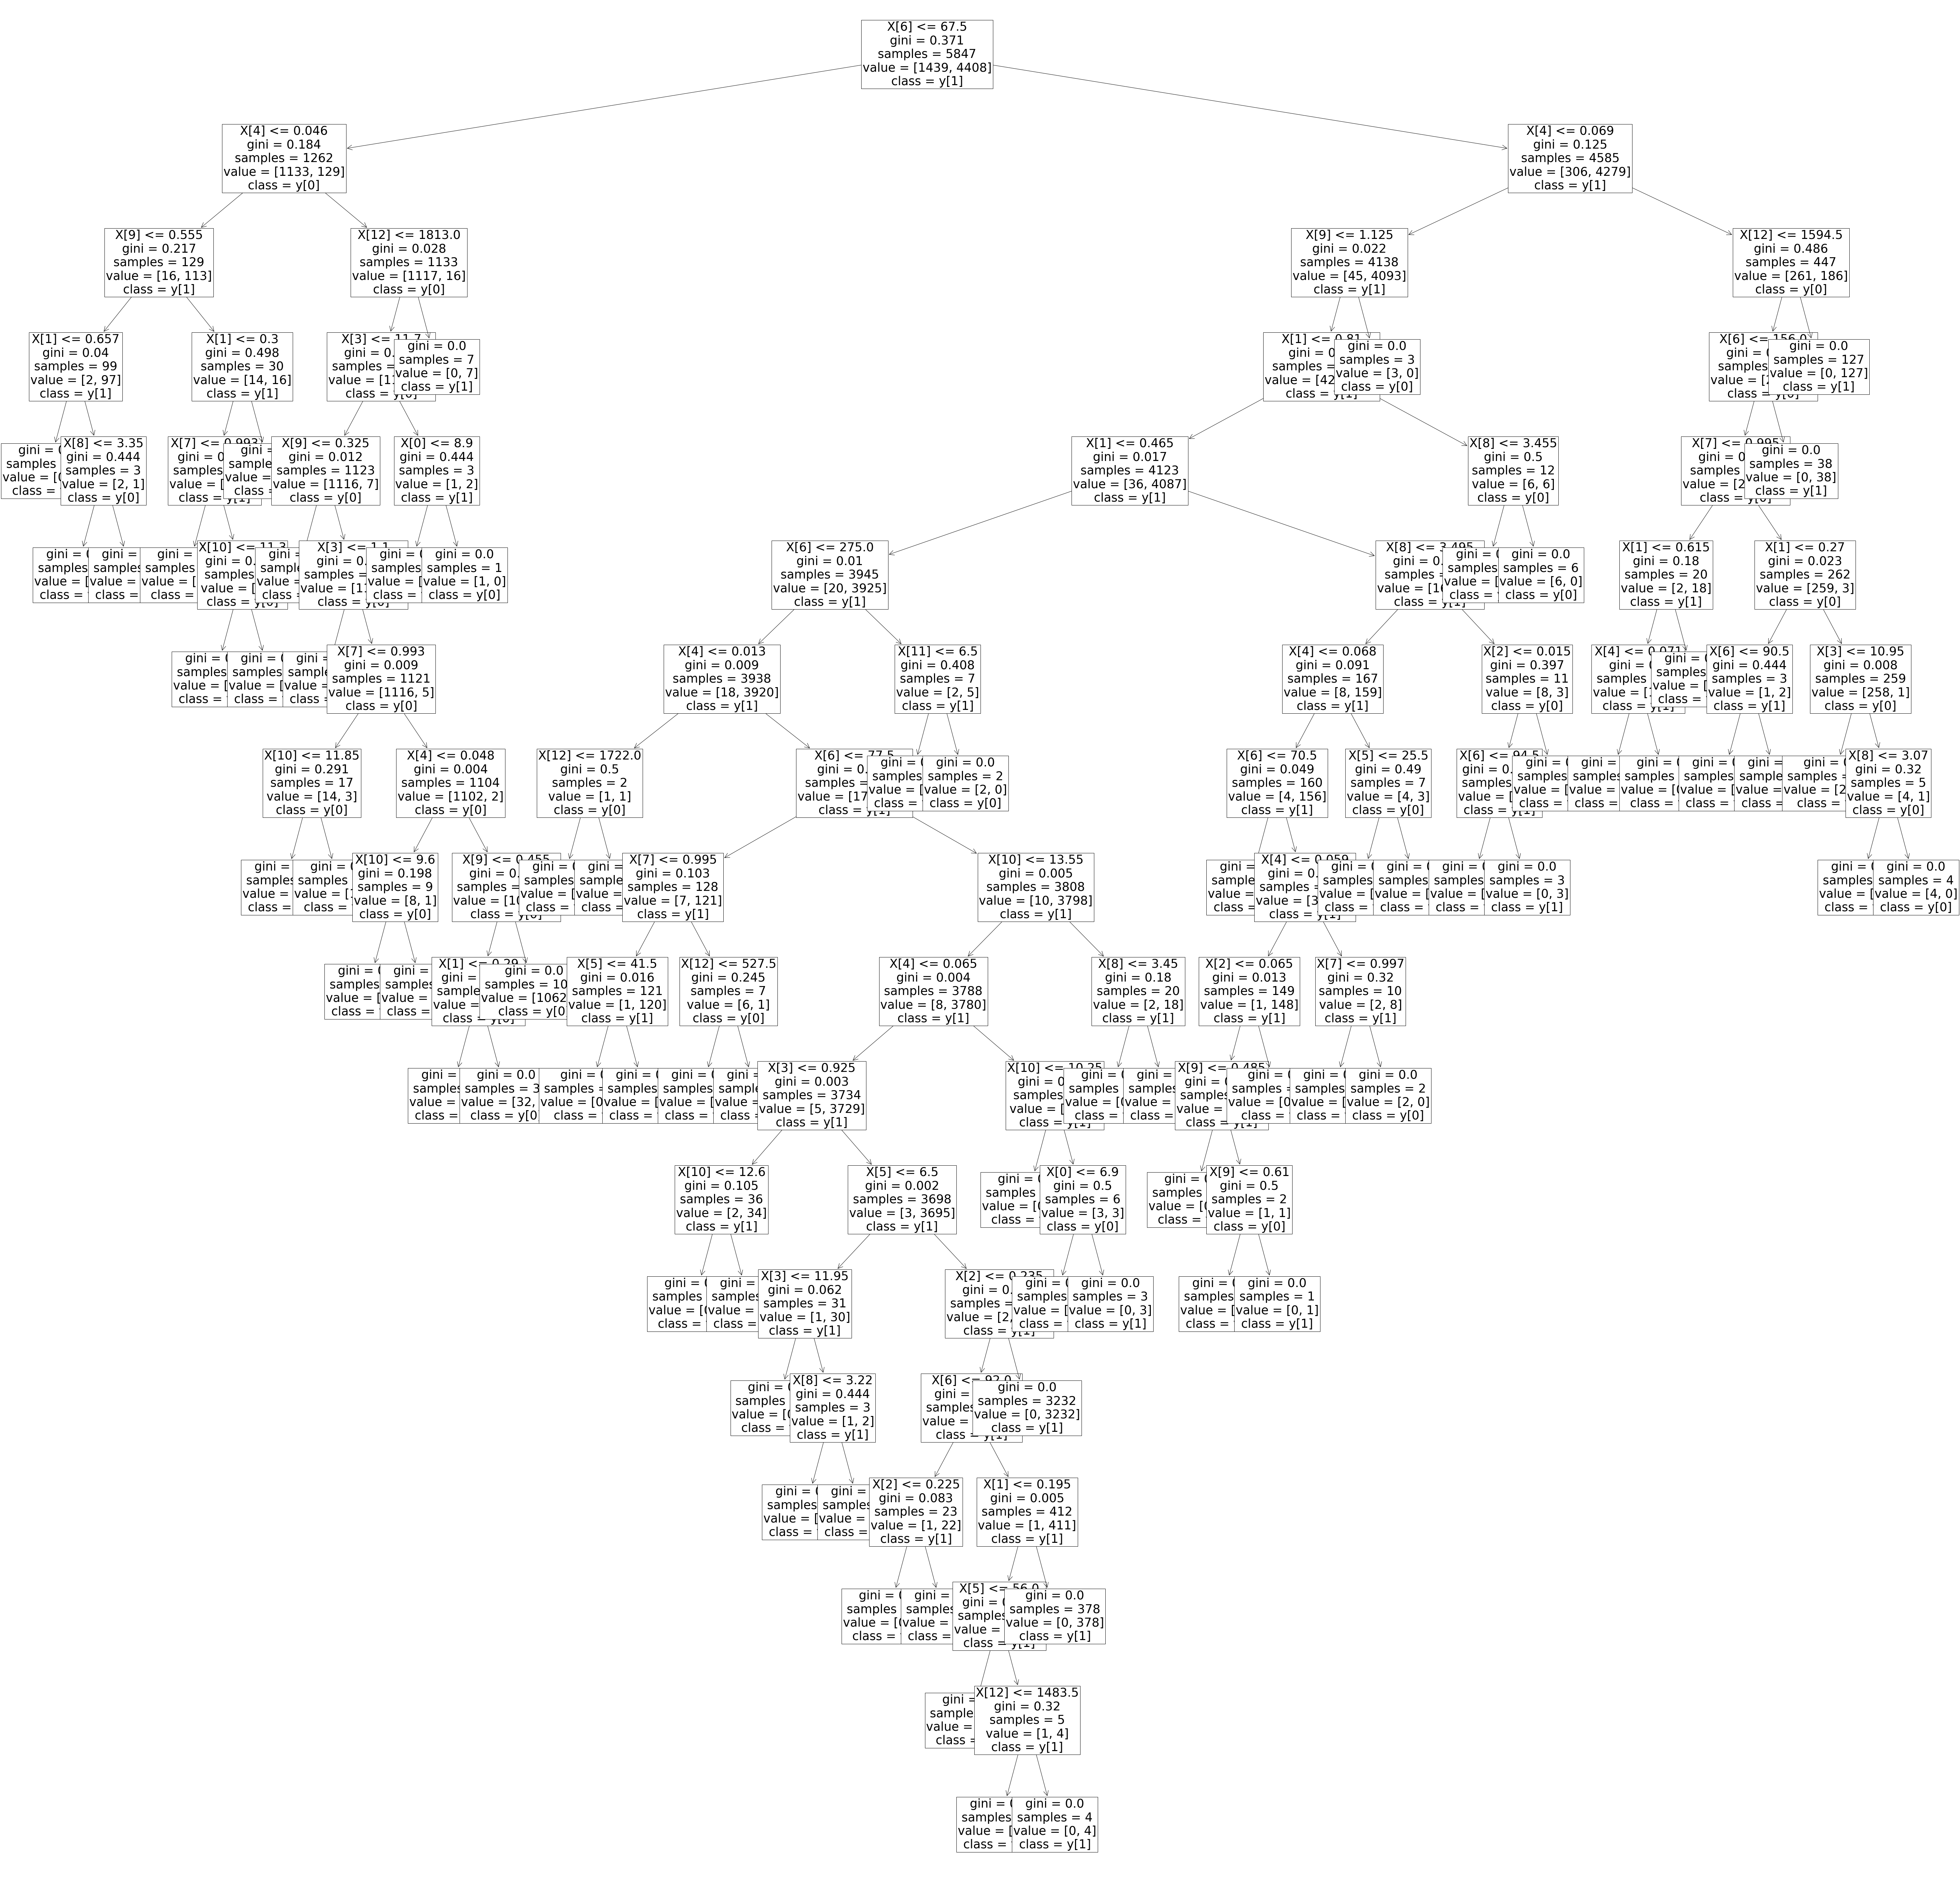

In [97]:
from sklearn import tree

plt.figure(figsize=(100,100))
tree.plot_tree(mod1, class_names=True, fontsize=35)

plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

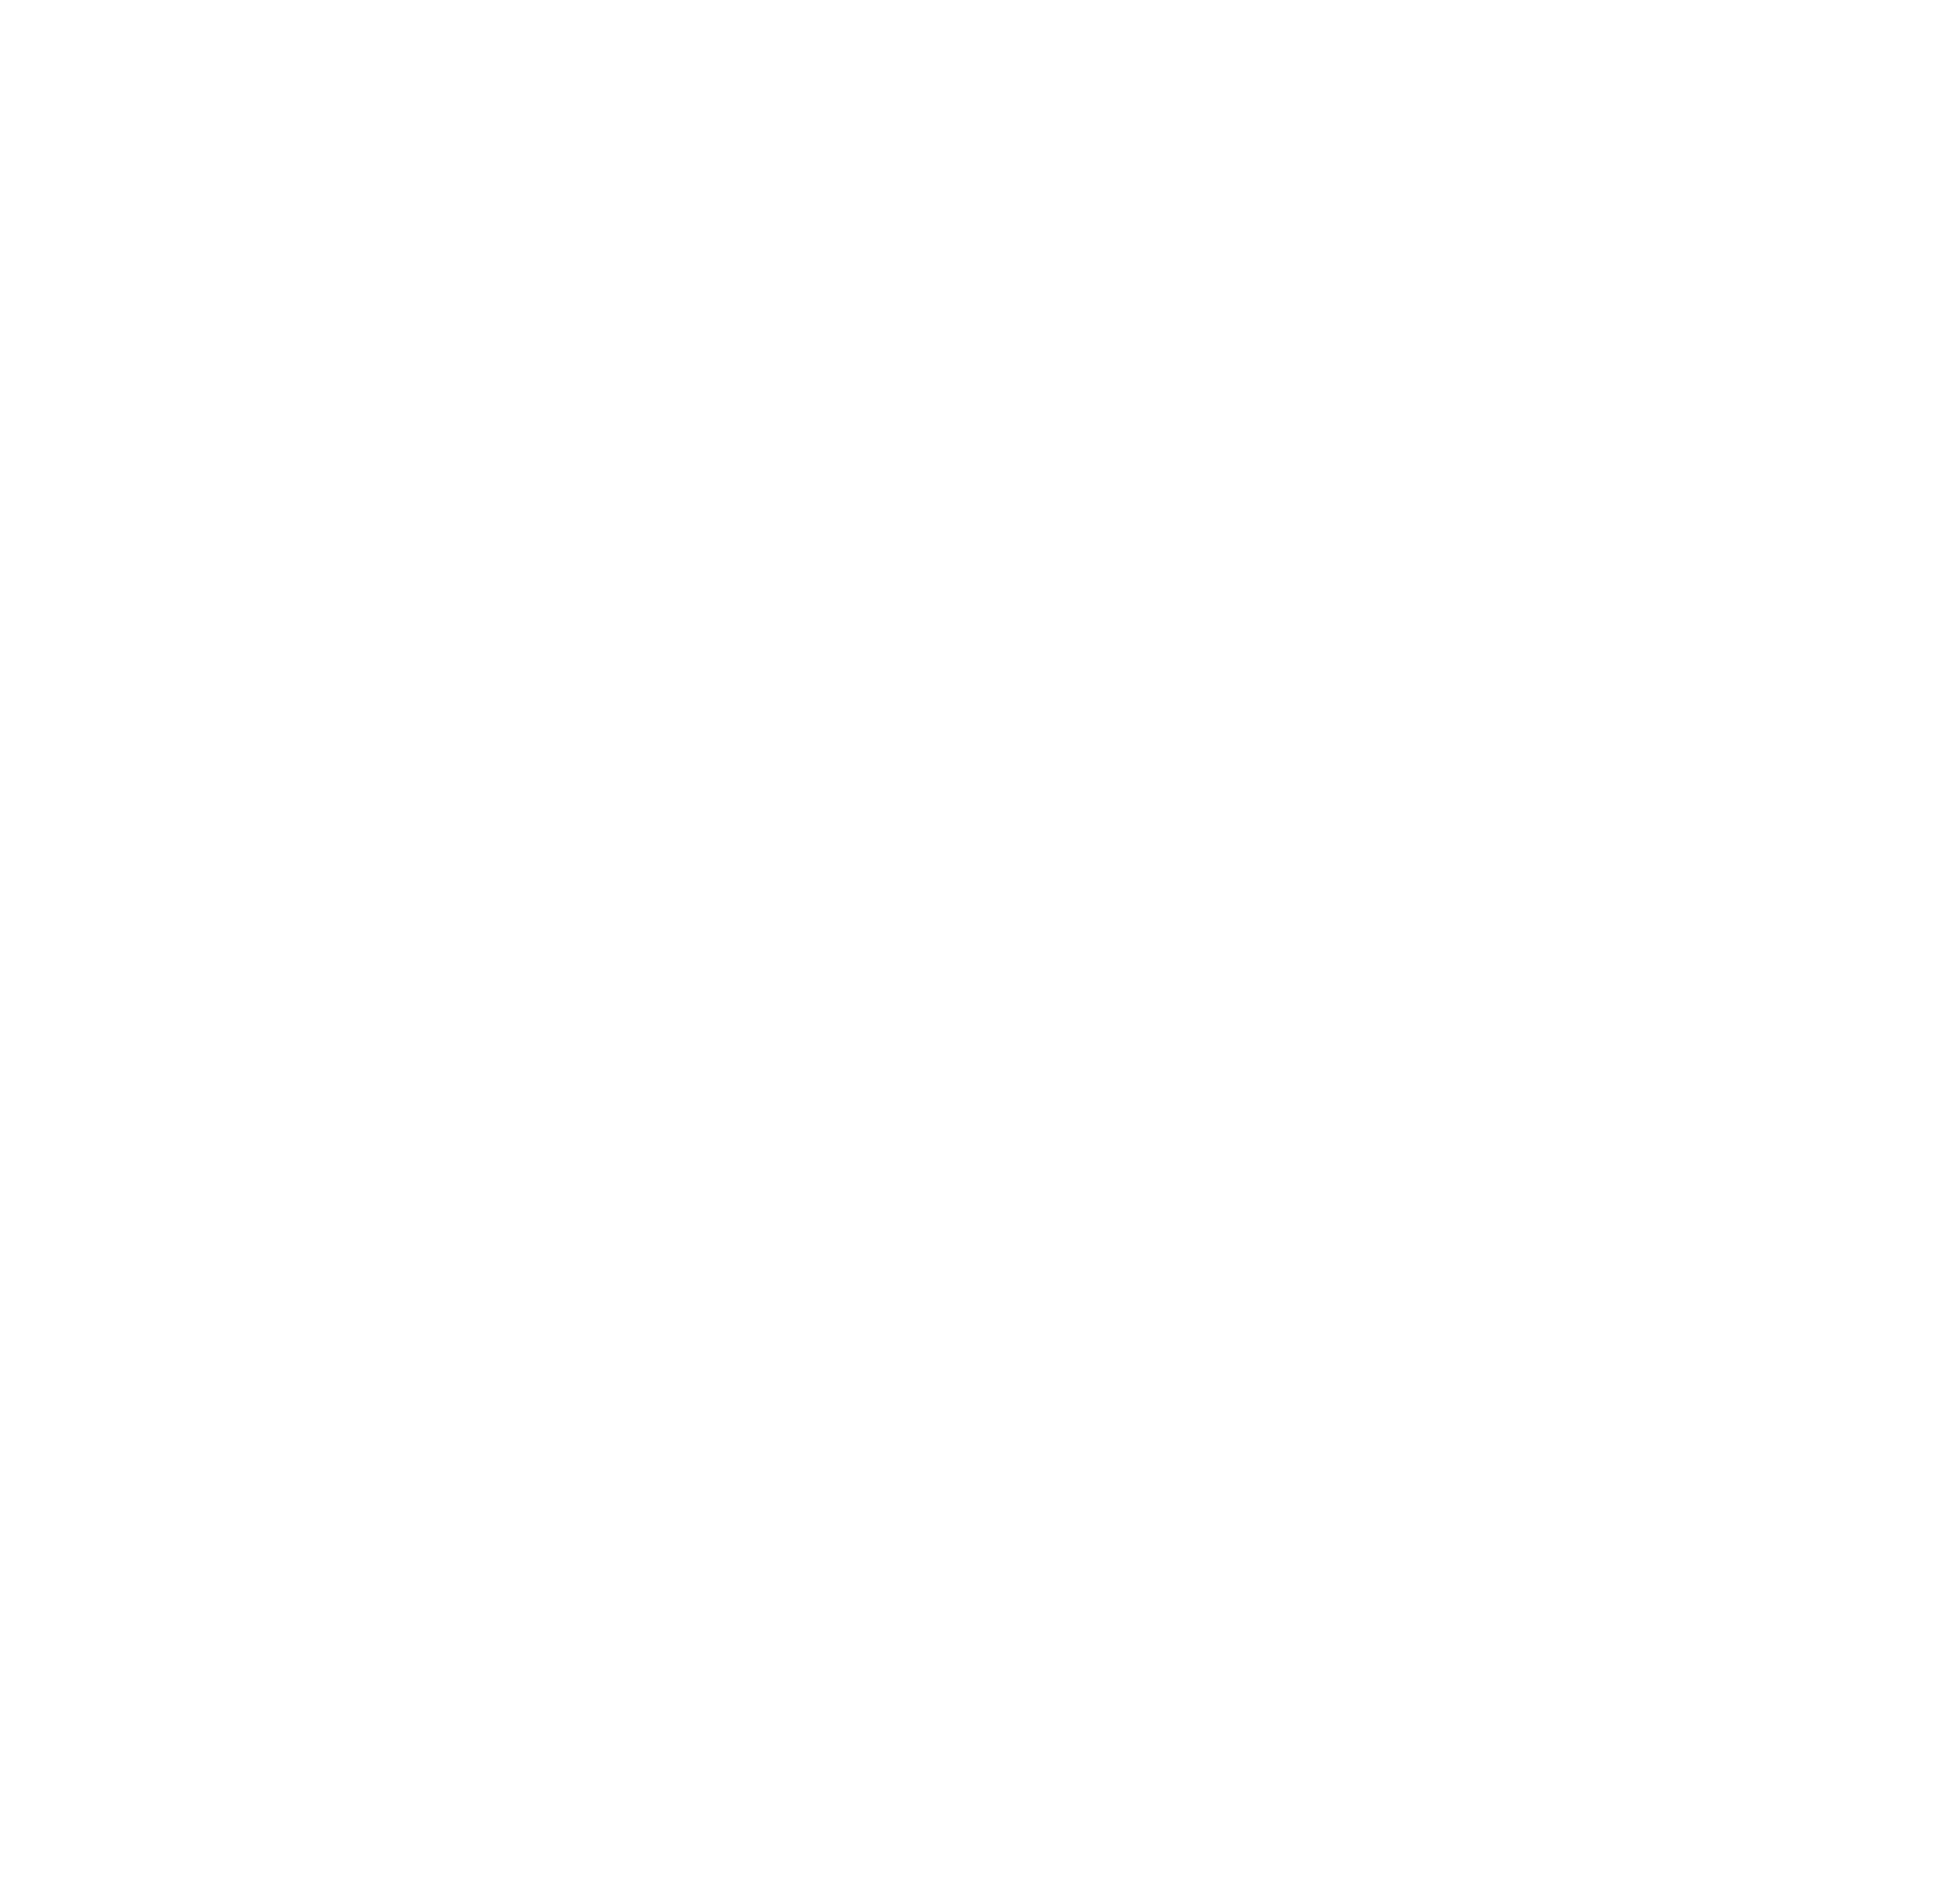

In [98]:
from sklearn import tree

plt.figure(figsize=(100,100))
tree.plot_tree(mod2, class_names=True, fontsize=35)

plt.show()

AttributeError: 'AdaBoostClassifier' object has no attribute 'tree_'

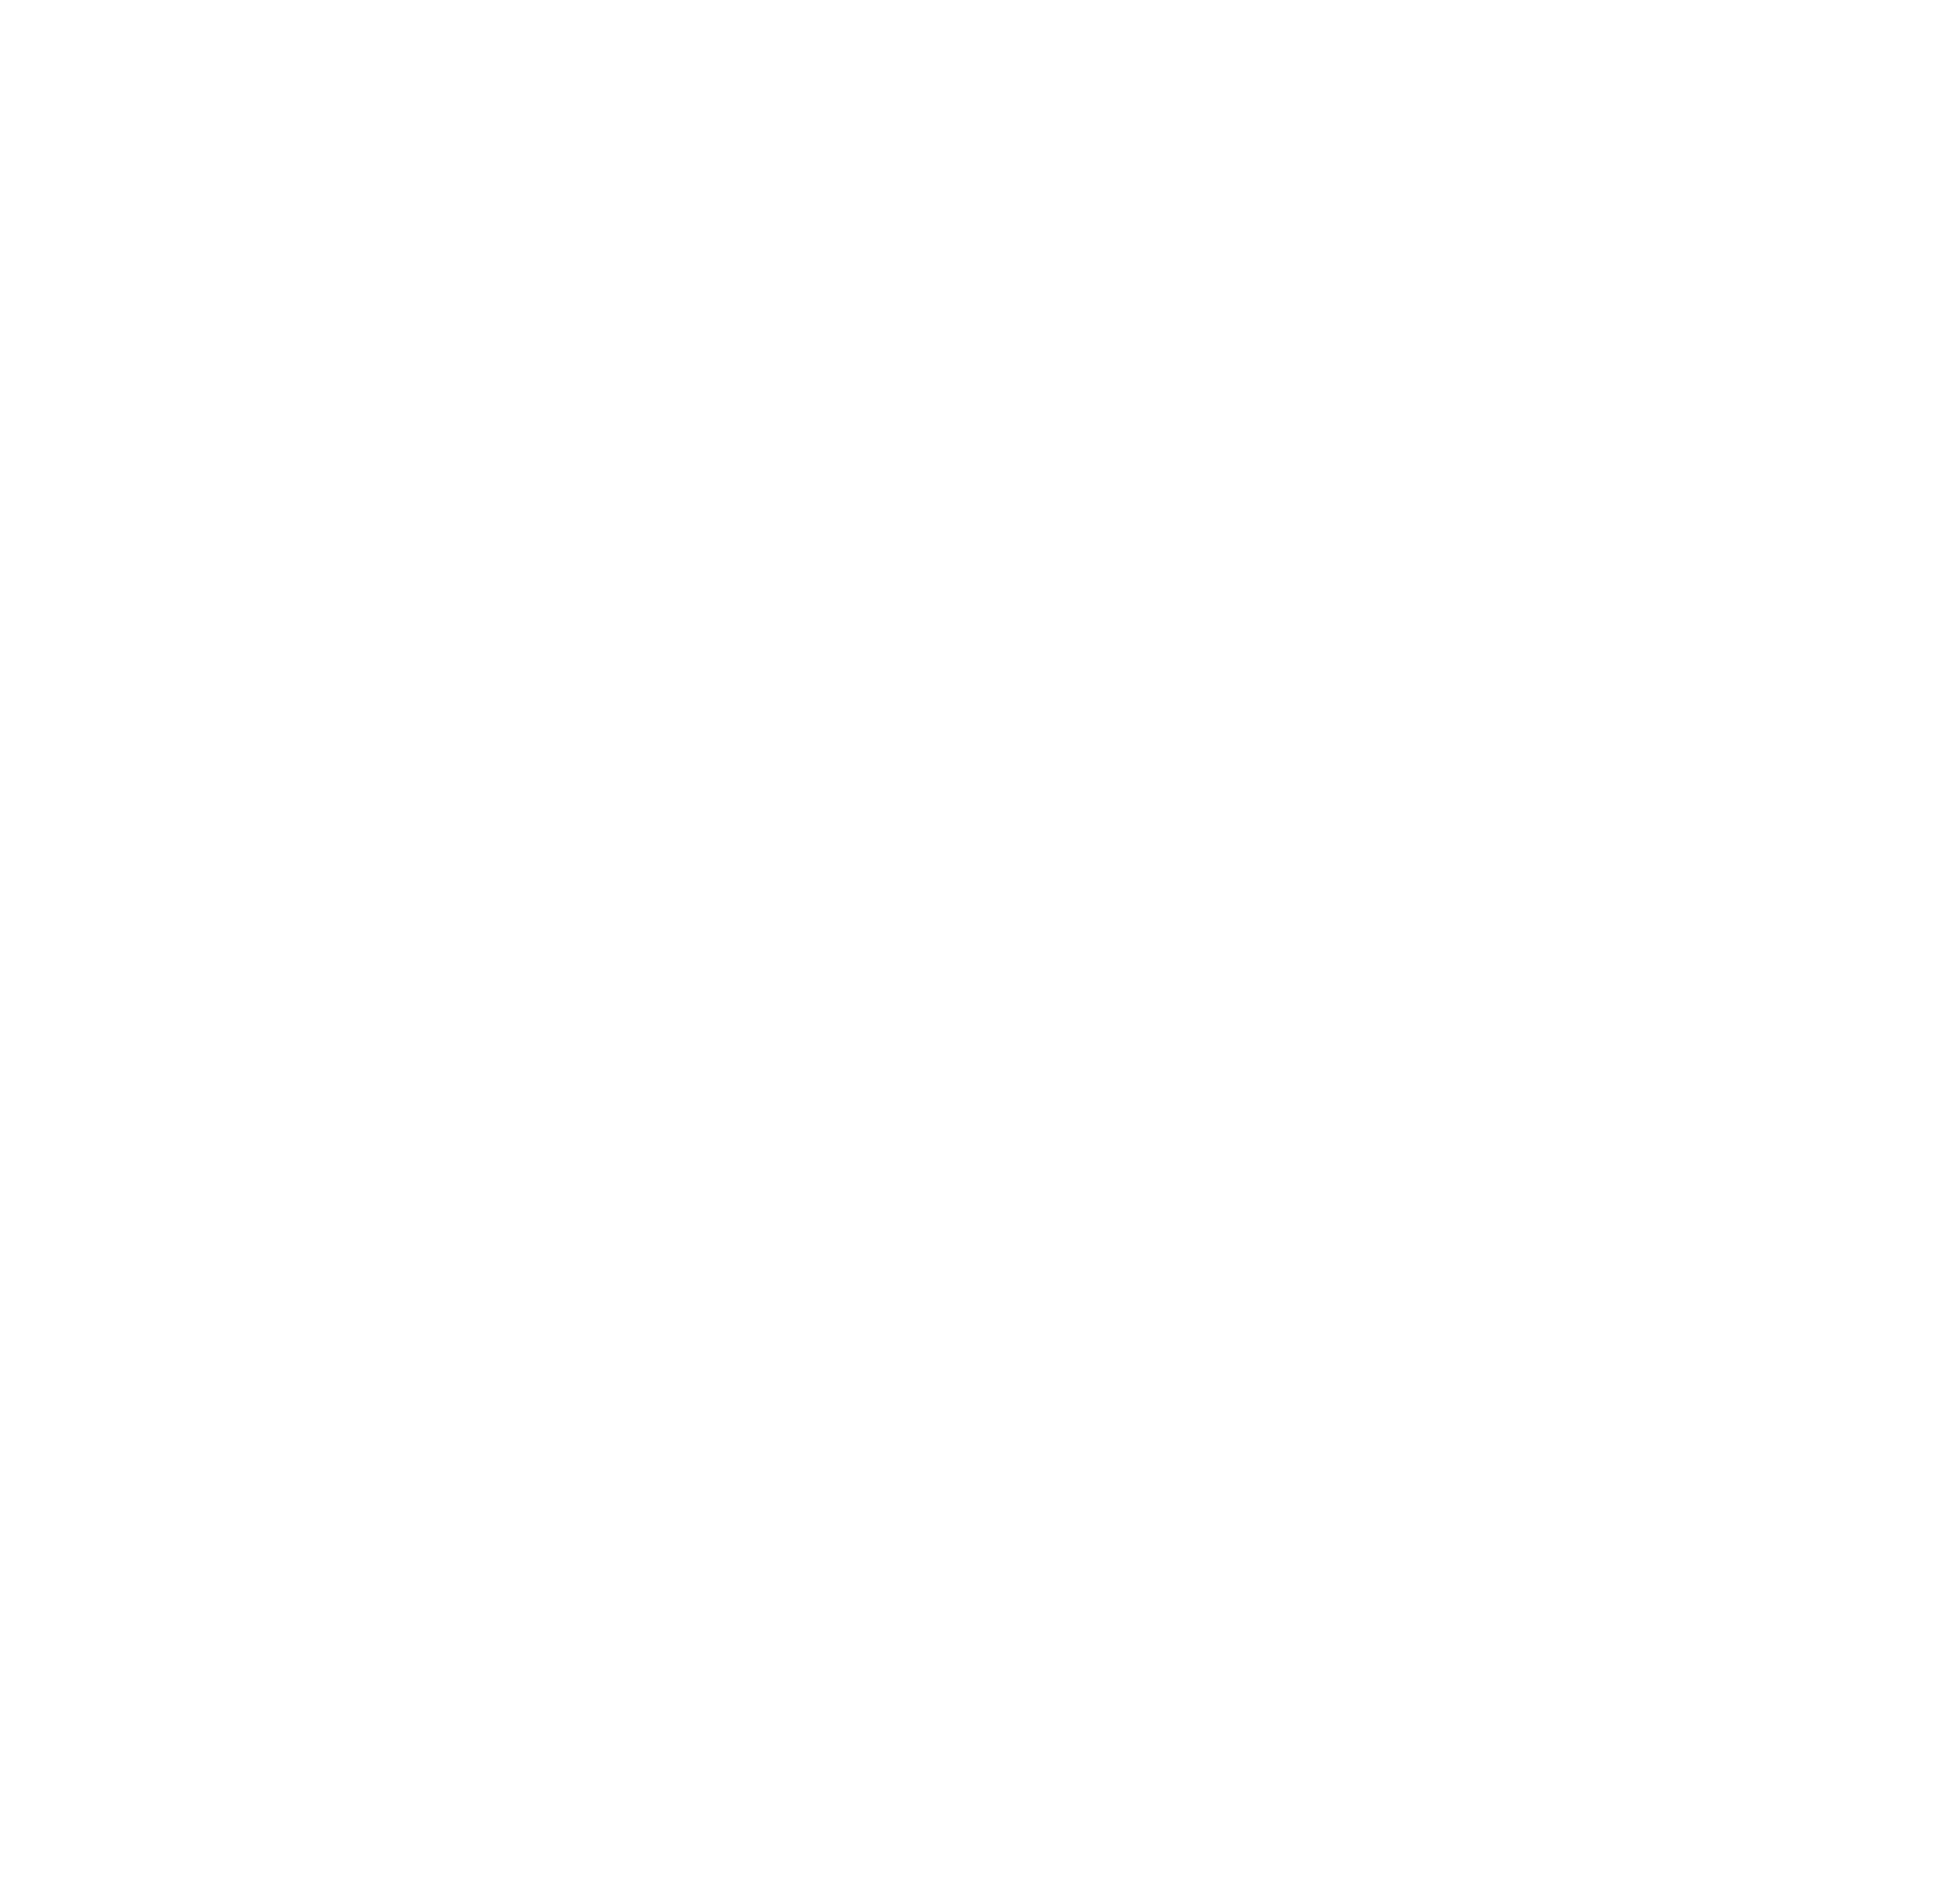

In [99]:
from sklearn import tree

plt.figure(figsize=(100,100))
tree.plot_tree(mod3, class_names=True, fontsize=35)

plt.show()